### Q.1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

 Matrix multiplication between an $(n, k)$ matrix and a $(k, m)$ matrix results in a new matrix of size $(n, m)$. The number of multiplications and additions involved in this matrix multiplication can be broken down as follows:

Multiplications:

For each element in the resulting matrix (of size $n x m$), we perform k multiplications.
Since the resulting matrix has n x m elements, the total number of multiplications is $n * m * k$.
Additions:

For each element in the resulting matrix, we perform $k - 1$ additions (as the first multiplication result does not require an addition).
Since the resulting matrix has $n x m$ elements, the total number of additions is $n * m * (k - 1)$.
Therefore, the total number of multiplications and additions in a matrix multiplication between an $(n, k)$ matrix and a $(k, m)$ matrix is:

Multiplications: $n * m * k$

Additions: $n * m * (k - 1)$

### Write Python code to multiply the above two matrices. Solve using list of lists 

In [59]:
def matrix_multiply(A, B):
    # Get dimensions of matrices A and B
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])

    # Check if matrices can be multiplied
    if cols_A != rows_B:
        print("Error: Incompatible matrix dimensions for multiplication")
        return None

    # Initialize the result matrix C with zeros
    C = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for r in range(cols_A):
                C[i][j] += A[i][r] * B[r][j]

    return C


In [60]:
# Define matrices A and B
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[7, 8, 9, 10],
     [11, 12, 13, 14],
     [15, 16, 17, 18]]



In [61]:
result_matrix = matrix_multiply(A, B)
if result_matrix:
    for row in result_matrix:
        print(row)

[74, 80, 86, 92]
[173, 188, 203, 218]


### Perform matrix multiplication using NumPy


In [63]:
import numpy as np   
result_matrix = np.dot(A, B)
print(result_matrix)

[[ 74  80  86  92]
 [173 188 203 218]]


In [64]:

import timeit
matrix_A = np.random.rand(100, 50)
matrix_B = np.random.rand(50, 200)

def matrix_multiply_numpy(matrix1, matrix2):
    return np.dot(matrix1, matrix2)

# Measure execution time for the manual implementation
time_lists = timeit.timeit(lambda: matrix_multiply(matrix_A.tolist(), matrix_B.tolist()), number=100)

# Measure execution time for the NumPy implementation
time_numpy = timeit.timeit(lambda: matrix_multiply_numpy(matrix_A, matrix_B), number=100)

# Print the execution times
print(f"Execution time for manual implementation: {time_lists:.6f} seconds")
print(f"Execution time for NumPy implementation: {time_numpy:.6f} seconds")

Execution time for manual implementation: 7.323859 seconds
Execution time for NumPy implementation: 0.007304 seconds


NumPy is highly optimized for numerical operations, and its matrix multiplication functions are implemented in low-level languages like C and Fortran. As a result, NumPy operations tend to be significantly faster than equivalent operations performed using pure Python, especially for large matrices.

Q.3 .Finding the highest element in a list requires one pass of the array.

In [2]:
def find_max_element(a):
    if not a:
        return None  

    max_element = a[0]  

    for element in a[1:]:
        if element > max_element:
            max_element = element  
    return max_element


In [24]:
example_array = [5, 2, 8, 1, 7, 3, 6, 4]
result_max = find_max_element(example_array)
print(f"The max of the array is: {result_max}")

The max of the array is: 8


Part 2 :Finding the second highest element requires 2 passes of the the array.

In [11]:
def find_second_max_element(a):
    first_max_element=find_max_element(a)
    second_max_element=a[0]
    for element in a[1:]:
        if element>second_max_element and element<first_max_element:
            second_max_element=element
    return second_max_element

result_second_max=find_second_max_element(example_array)
print(f"The second max element of the array is: {result_second_max}")

The second max element of the array is: 7


In [25]:
def find_median_twopass(a): 
    n=len(a)
    # print(n)
    a=sorted(a)
    if n%2 == 0:
        a=a[0:(n//2)+1]
        first_max_element = find_max_element(a)
        second_max_element = find_second_max_element(a)
        median=(first_max_element+second_max_element)/2

    else:
        a=a[0:(n//2)+1]
        max_element=find_max_element(a)
        median=max_element        

    return median   

In [26]:
result_median=find_median_twopass(example_array)
print(f"The median of the array is: {result_median}")

The median of the array is: 4.5


### Using this method, what is the time complexity of finding the median of the array? 


The time complexity of the find_median program you provided is influenced by the time complexities of the functions it calls, specifically sorted(a), find_max_element(a), and find_second_max_element(a).

Let's analyze the time complexity step by step:

sorted(a): This function uses an efficient sorting algorithm. Typically, the time complexity of sorting algorithms is O(n log n), where n is the length of the array.

find_max_element(a): This function iterates through the array once, finding the maximum element. Therefore, its time complexity is O(n), where n is the length of the array.

find_second_max_element(a): This function also iterates through the array once, finding the second maximum element. Therefore, its time complexity is O(n), where n is the length of the array.

Additional operations in the code are constant time.

Therefore, the overall time complexity of the find_median program is O(n log n), where n is the length of the array.

### Can you suggest a better method? 

A more efficient method for finding the median is to use an algorithm called QuickSelect. QuickSelect is a variation of the QuickSort algorithm and is specifically designed for finding the k-th smallest (or largest) element in an unordered list.

In [27]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1




In [28]:
def quick_select(arr, low, high, k):
    if low <= high:
        partition_index = partition(arr, low, high)

        if partition_index == k:
            return arr[partition_index]
        elif partition_index < k:
            return quick_select(arr, partition_index + 1, high, k)
        else:
            return quick_select(arr, low, partition_index - 1, k)


In [29]:
def find_median_quick_select(arr):
    n = len(arr)
    if n % 2 == 1:
        # For an odd number of elements, return the middle element
        return quick_select(arr, 0, n - 1, n // 2)
    else:
        # For an even number of elements, return the average of the two middle elements
        middle1 = quick_select(arr, 0, n - 1, n // 2 - 1)
        middle2 = quick_select(arr, 0, n - 1, n // 2)
        return (middle1 + middle2) / 2

In [30]:
example_array = [5, 2, 8, 1, 7, 3, 6, 4]

# Find the median
result_median = find_median_quick_select(example_array)

# Display the result
print(f"The median of the array is: {result_median}")

The median of the array is: 4.5


QuickSelect is designed to efficiently find the k-th smallest (or largest) element in an unordered list without the need to fully sort the entire list. Its average-case time complexity is O(n) because, on average, it reduces the problem size by half in each recursive call

### Can you implement both these methods in Python and compare against numpy.median routine in terms of time?


In [31]:
import numpy as np
import timeit
def compare_methods(arr):
    time_quickselect = timeit.timeit(lambda: find_median_quick_select(arr.copy()), number=1000)
    time_twopass = timeit.timeit(lambda: find_median_twopass(arr.copy()), number=1000)
    time_numpy = timeit.timeit(lambda: np.median(arr), number=1000)

    print(f"Time taken for QuickSelect method: {time_quickselect:.6f} seconds")
    print(f"Time taken for Two-pass method: {time_twopass:.6f} seconds")
    print(f"Time taken for NumPy median routine: {time_numpy:.6f} seconds")

# Example array
example_array = [5, 2, 8, 1, 7, 3, 6, 4]

# Compare methods
compare_methods(example_array)

Time taken for QuickSelect method: 0.002233 seconds
Time taken for Two-pass method: 0.002092 seconds
Time taken for NumPy median routine: 0.025179 seconds


### Q.4Find the gradient of the following functions:  $f(x, y) = x^2y + y^3\sin(x)$.



The partial derivatives are given by:

1. Partial derivative with respect to $x$:
$$
\frac{\partial f}{\partial x} = 2xy + y^3\cos(x)
$$
2. Partial derivative with respect to $y$:
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)
$$

The gradient vector $\nabla f$ is given by:
$$
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left(2xy + y^3\cos(x), x^2 + 3y^2\sin(x)\right)
$$

### Q.5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [1]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


In [2]:
# Define the analytical gradients
def analytical_gradients(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

In [11]:
def gradient_jax(f, x, y):
    return jnp.array([jax.grad(f, 0)(x[i], y[i]) for i in range(len(x))]), \
           jnp.array([jax.grad(f, 1)(x[i], y[i]) for i in range(len(y))])



In [12]:
# Compare the gradients for random values of x and y
random_x = jax.random.uniform(jax.random.PRNGKey(0), shape=(3,), minval=0.5, maxval=100.0)
random_y = jax.random.uniform(jax.random.PRNGKey(1), shape=(3,), minval=0.5, maxval=100.0)
analytical_gradients_result = analytical_gradients(random_x, random_y)
print(random_x)
print(random_y)

[96.549484 31.810823 63.48648 ]
[57.070972 26.23108  88.988304]


In [13]:
for i in range(3):
    print(f"Point {i + 1}:")
    print(f"Analytical Gradient: ({analytical_gradients_result[0][i]}, {analytical_gradients_result[1][i]})")
    print()

Point 1:
Analytical Gradient: (-113066.9140625, 16597.1953125)

Point 2:
Analytical Gradient: (18328.568359375, 1806.056396484375)

Point 3:
Analytical Gradient: (570312.75, 18495.1640625)



In [19]:
jax_gradients_result_x, jax_gradients_result_y = gradient_jax(f, random_x, random_y)

# Print the results
for i in range(3):
    print(f"Point {i + 1}:")
    print(f"JAX Gradient for x: {jax_gradients_result_x[i]}")
    print(f"JAX Gradient for y: {jax_gradients_result_y[i]}")
    print()


Point 1:
JAX Gradient for x: -113066.9140625
JAX Gradient for y: 16597.1953125

Point 2:
JAX Gradient for x: 18328.568359375
JAX Gradient for y: 1806.056396484375

Point 3:
JAX Gradient for x: 570312.75
JAX Gradient for y: 18495.1640625



In [25]:
import sympy as sp
x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Print the analytical gradients
print(f"Analytical Gradient for x: {df_dx}")
print(f"Analytical Gradient for y: {df_dy}")

# Compare the analytical gradients with JAX result
for i in range(3):
    print(f"Point {i + 1}:")
    print(f"Analytical Gradient: ({analytical_gradients_result[0][i]}, {analytical_gradients_result[1][i]})")
    print(f"Analytical Gradient for x using sympy: {df_dx.evalf(subs={x: random_x[i], y: random_y[i]})}")
    print(f"Analytical Gradient for y using sympy: {df_dy.evalf(subs={x: random_x[i], y: random_y[i]})}")
    print()


Analytical Gradient for x: 2*x*y + y**3*cos(x)
Analytical Gradient for y: x**2 + 3*y**2*sin(x)
Point 1:
Analytical Gradient: (-113066.9140625, 16597.1953125)
Analytical Gradient for x using sympy: -113066.902970639
Analytical Gradient for y using sympy: 16597.1946066919

Point 2:
Analytical Gradient: (18328.568359375, 1806.056396484375)
Analytical Gradient for x using sympy: 18328.5661072909
Analytical Gradient for y using sympy: 1806.05640728830

Point 3:
Analytical Gradient: (570312.75, 18495.1640625)
Analytical Gradient for x using sympy: 570312.734894009
Analytical Gradient for y using sympy: 18495.1636873592



### Q.9 Using matplotlib plot the following functions on the domain: $x = 0.5$ to $100.0$ in steps of $0.5$.

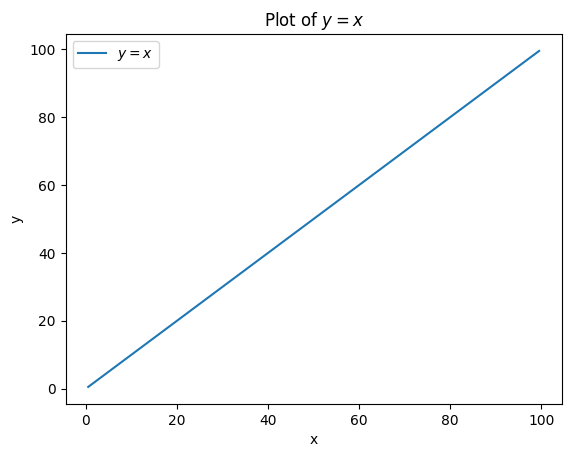

In [3]:
import matplotlib.pyplot as plt

x_values = np.arange(0.5, 100.0, 0.5)

y_values = x_values
plt.plot(x_values, y_values, label='$y = x$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = x$')
plt.legend();


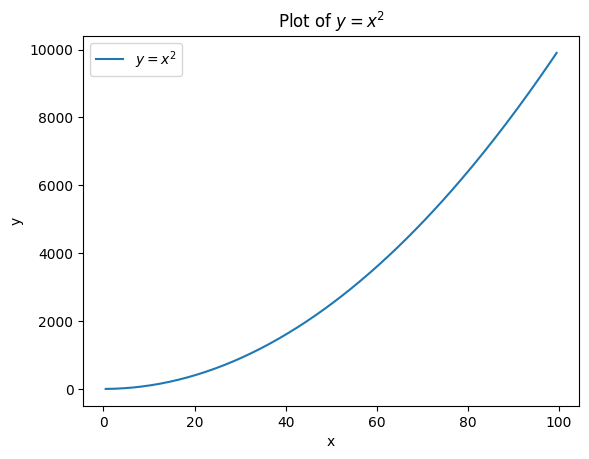

In [4]:
x_values = np.arange(0.5, 100.0, 0.5)
def squared_function(x):
    return x**2
y_values = squared_function(x_values)
plt.plot(x_values, y_values, label='$y = x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = x^2$')
plt.legend();

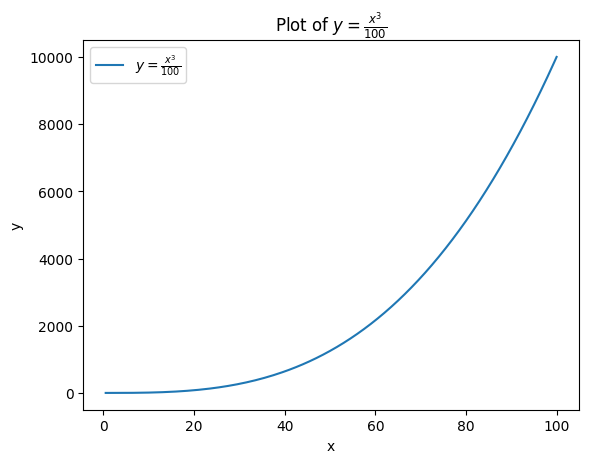

In [5]:
def my_function(x):
    return x**3 / 100
x_values = np.arange(0.5, 100.5, 0.5)
y_values = my_function(x_values)
plt.plot(x_values, y_values, label=r'$y = \frac{x^3}{100}$')
plt.title('Plot of $y = \\frac{x^3}{100}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

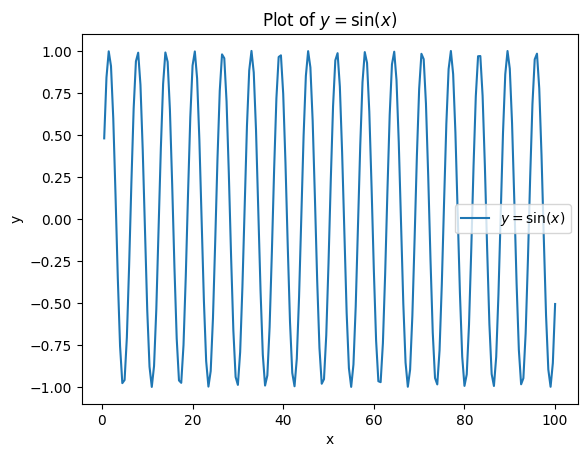

In [6]:
x_values = np.arange(0.5, 100.5, 0.5)
y_values = np.sin(x_values)
plt.plot(x_values, y_values, label=r'$y = \sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = \sin(x)$')
plt.legend();


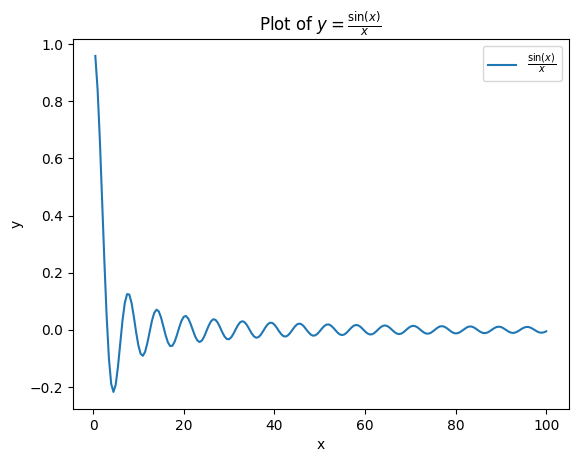

In [7]:
def func(x):
    return np.sin(x) / x
x_values = np.arange(0.5, 100.5, 0.5)
y_values = func(x_values)
plt.plot(x_values, y_values, label=r'$\frac{\sin(x)}{x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = \\frac{\\sin(x)}{x}$')
plt.legend();

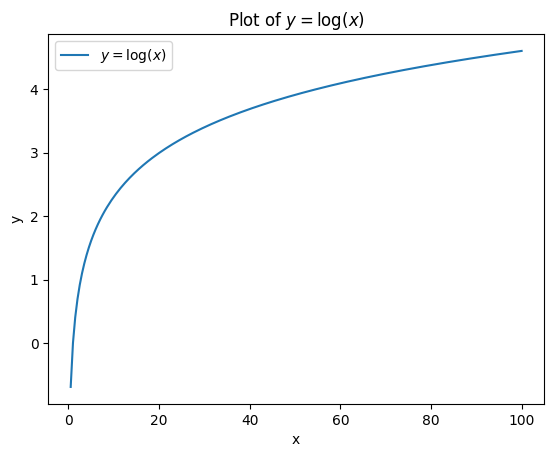

In [8]:
x_values = np.arange(0.5, 100.5, 0.5)
y_values = np.log(x_values)
plt.plot(x_values, y_values, label=r'$y = \log(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = \log(x)$')
plt.legend();


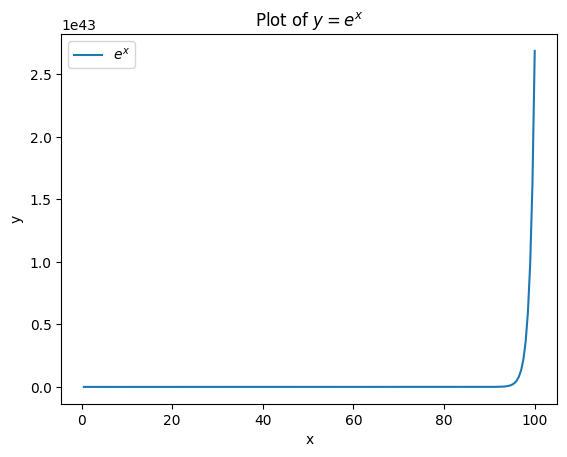

In [9]:
def exponential_function(x):
    return np.exp(x)
x_values = np.arange(0.5, 100.5, 0.5)
y_values = exponential_function(x_values)
plt.plot(x_values, y_values, label='$e^x$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = e^x$')
plt.legend();


### Q.12 Write a small piece of code to explain broadcasting in numpy.



In [26]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([10, 20, 30])

result = A + B
print("Array A:")
print(A)
print("\nArray B:")
print(B)
print("\nResult of A + B (broadcasting):")
print(result)


Array A:
[[1 2 3]
 [4 5 6]]

Array B:
[10 20 30]

Result of A + B (broadcasting):
[[11 22 33]
 [14 25 36]]


### Q 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [28]:
import numpy as np

def custom_argmin(arr):
    if arr.size == 0:
        raise ValueError("Input array is empty")
    min_value = arr[0]
    min_index = 0
    for i, value in enumerate(arr):
        if value < min_value:
            min_value = value
            min_index = i

    return min_index



In [30]:
arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
custom_min_index = custom_argmin(arr)
numpy_min_index = np.argmin(arr)
print("Array:", arr)
print("Custom argmin result:", custom_min_index)
print("NumPy argmin result:", numpy_min_index)


Array: [3 1 4 1 5 9 2 6 5 3 5]
Custom argmin result: 1
NumPy argmin result: 1


Q.10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2.

In [32]:
np.random.seed(42)
random_matrix = np.random.uniform(1, 2, size=(20, 5))
print(random_matrix)


[[1.37454012 1.95071431 1.73199394 1.59865848 1.15601864]
 [1.15599452 1.05808361 1.86617615 1.60111501 1.70807258]
 [1.02058449 1.96990985 1.83244264 1.21233911 1.18182497]
 [1.18340451 1.30424224 1.52475643 1.43194502 1.29122914]
 [1.61185289 1.13949386 1.29214465 1.36636184 1.45606998]
 [1.78517596 1.19967378 1.51423444 1.59241457 1.04645041]
 [1.60754485 1.17052412 1.06505159 1.94888554 1.96563203]
 [1.80839735 1.30461377 1.09767211 1.68423303 1.44015249]
 [1.12203823 1.49517691 1.03438852 1.9093204  1.25877998]
 [1.66252228 1.31171108 1.52006802 1.54671028 1.18485446]
 [1.96958463 1.77513282 1.93949894 1.89482735 1.59789998]
 [1.92187424 1.0884925  1.19598286 1.04522729 1.32533033]
 [1.38867729 1.27134903 1.82873751 1.35675333 1.28093451]
 [1.54269608 1.14092422 1.80219698 1.07455064 1.98688694]
 [1.77224477 1.19871568 1.00552212 1.81546143 1.70685734]
 [1.72900717 1.77127035 1.07404465 1.35846573 1.11586906]
 [1.86310343 1.62329813 1.33089802 1.06355835 1.31098232]
 [1.32518332 1

### Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”.

In [34]:
import pandas as pd
column_names = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(random_matrix, columns=column_names)
print(df)

           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1.887213  1.

### Find the column with the highest standard deviation.

In [36]:
max_std_column = df.std().idxmax()
print(f"The column with the highest standard deviation is: {max_std_column}")

The column with the highest standard deviation is: c


### Find the row with the lowest mean

In [37]:
min_mean_row = df.mean(axis=1).idxmin()
print(f"The row with the lowest mean is: {min_mean_row}")

The row with the lowest mean is: 11


### Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.

In [38]:
# Add a new column "f" which is the sum of columns "a" through "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
print(df)

           a         b         c         d         e         f
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452
13  1.542696  1.140924  1.802197  1.074551  1.986887  7.547255
14  1.772245  1.198716  1.005522  1.815461  1.706857  7

### Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. 

In [39]:
# Add a new column "g" based on the condition
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
print(df)

           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.074551  1.98

### Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [41]:
# Calculate the standard deviation of column "f" for each group
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

# Print the results
print(f"Standard Deviation of column 'f' for 'LT8': {std_lt8}")
print(f"Standard Deviation of column 'f' for 'GT8': {std_gt8}")


Standard Deviation of column 'f' for 'LT8': 0.4025886500663062
Standard Deviation of column 'f' for 'GT8': 0.7956146881961926


### Q 7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2

In [44]:
student_records = {
    2022: {
        'Branch 1': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
            # Add more roll numbers and details as needed
        },
        'Branch 2': {
            # Add details for Branch 2
        }
    },
    2023: {
        'Branch 1': {
            # Add details for Branch 1 in 2023
        },
        'Branch 2': {
            # Add details for Branch 2 in 2023
        }
    },
    2024: {
        'Branch 1': {
            # Add details for Branch 1 in 2024
        },
        'Branch 2': {
            # Add details for Branch 2 in 2024
        }
    },
    2025: {
        'Branch 1': {
            # Add details for Branch 1 in 2025
        },
        'Branch 2': {
            # Add details for Branch 2 in 2025
        }
    }
}


# Function to generate random student data
def generate_random_student_data():
    name = 'Student' 
    subjects = ['Maths', 'English', 'Science', 'History', 'Art']
    marks = {subject: np.random.randint(60, 100) for subject in subjects}
    return {'Name': name, 'Marks': marks}

# Populate the nested dictionary with random data
for year in range(2022, 2026):
    for branch in ['Branch 1', 'Branch 2']:
        student_records[year][branch] = {}
        for roll_number in range(1, 6): 
            student_records[year][branch][roll_number] = generate_random_student_data()

print(student_records)



{2022: {'Branch 1': {1: {'Name': 'Student', 'Marks': {'Maths': 68, 'English': 98, 'Science': 88, 'History': 85, 'Art': 94}}, 2: {'Name': 'Student', 'Marks': {'Maths': 84, 'English': 83, 'Science': 72, 'History': 66, 'Art': 95}}, 3: {'Name': 'Student', 'Marks': {'Maths': 79, 'English': 60, 'Science': 67, 'History': 75, 'Art': 73}}, 4: {'Name': 'Student', 'Marks': {'Maths': 71, 'English': 82, 'Science': 74, 'History': 87, 'Art': 93}}, 5: {'Name': 'Student', 'Marks': {'Maths': 61, 'English': 91, 'Science': 82, 'History': 81, 'Art': 84}}}, 'Branch 2': {1: {'Name': 'Student', 'Marks': {'Maths': 81, 'English': 81, 'Science': 65, 'History': 74, 'Art': 96}}, 2: {'Name': 'Student', 'Marks': {'Maths': 92, 'English': 67, 'Science': 64, 'History': 98, 'Art': 63}}, 3: {'Name': 'Student', 'Marks': {'Maths': 65, 'English': 91, 'Science': 89, 'History': 94, 'Art': 99}}, 4: {'Name': 'Student', 'Marks': {'Maths': 75, 'English': 72, 'Science': 89, 'History': 78, 'Art': 76}}, 5: {'Name': 'Student', 'Marks

### Store the same information using Python classes. 

In [53]:
class Subject:
    def __init__(self, name):
        self.name = name
        self.marks = 0

class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.subjects = {}

    def add_subject(self, subject):
        self.subjects[subject.name] = subject

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class AcademicYear:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class OverallDatabase:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)
       

In [54]:
# Generate random data
def generate_random_marks():
    return np.random.randint(60, 100)

In [55]:
# Create instances of classes and store information
database = OverallDatabase()

for year_number in range(2022, 2026):
    academic_year = AcademicYear(year_number)

    for branch_name in ['Branch 1', 'Branch 2']:
        branch = Branch(branch_name)

        for roll_number in range(1, 6):  
            student = Student(roll_number, f"Student_{roll_number}")
            
            for subject_name in ['Maths', 'English', 'Science', 'History', 'Art']:
                subject = Subject(subject_name)
                subject.marks = generate_random_marks()
                student.add_subject(subject)

            branch.add_student(student)

        academic_year.add_branch(branch)

    database.add_year(academic_year)

In [57]:
for year in database.years:
    print(f"\nYear: {year.year}")
    for branch in year.branches:
        print(f"\nBranch: {branch.name}")
        for student in branch.students:
            print(f"\nStudent: {student.name}, Roll Number: {student.roll_number}")
            for subject_name, subject in student.subjects.items():
                print(f"Subject: {subject_name}, Marks: {subject.marks}")



Year: 2022

Branch: Branch 1

Student: Student_1, Roll Number: 1
Subject: Maths, Marks: 63
Subject: English, Marks: 84
Subject: Science, Marks: 62
Subject: History, Marks: 91
Subject: Art, Marks: 62

Student: Student_2, Roll Number: 2
Subject: Maths, Marks: 86
Subject: English, Marks: 88
Subject: Science, Marks: 91
Subject: History, Marks: 78
Subject: Art, Marks: 80

Student: Student_3, Roll Number: 3
Subject: Maths, Marks: 64
Subject: English, Marks: 77
Subject: Science, Marks: 87
Subject: History, Marks: 81
Subject: Art, Marks: 80

Student: Student_4, Roll Number: 4
Subject: Maths, Marks: 65
Subject: English, Marks: 60
Subject: Science, Marks: 64
Subject: History, Marks: 71
Subject: Art, Marks: 85

Student: Student_5, Roll Number: 5
Subject: Maths, Marks: 93
Subject: English, Marks: 73
Subject: Science, Marks: 85
Subject: History, Marks: 86
Subject: Art, Marks: 68

Branch: Branch 2

Student: Student_1, Roll Number: 1
Subject: Maths, Marks: 85
Subject: English, Marks: 81
Subject: Sci